In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

pd.set_option('display.max_columns', None)

In [ ]:
dataf = pd.read_csv('car_price_assign.csv', delimiter=',')
dataf.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
dataf.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

So There is no null value features

In [ ]:
dataf.shape

(205, 26)

In [ ]:
# Filter the Numerical & Categorical Features
numerical_feat = dataf.columns[dataf.dtypes != 'O']
numerical_feat

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
categorical_feat = dataf.columns[dataf.dtypes == 'O']
categorical_feat

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [ ]:
# We don't need the car_ID Feature so we can drop that
dataf.drop(['car_ID'], axis=1, inplace=True)

In [ ]:
dataf.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Filter the Discrete & Contineous features from the numerical Features
discrete_feat = dataf.columns[dataf.dtypes == 'int64']
discrete_feat

Index(['symboling', 'curbweight', 'enginesize', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object')

In [ ]:
contineous_feat = dataf.columns[dataf.dtypes == 'float64']
contineous_feat

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'],
      dtype='object')

In [ ]:
# Find the Each Unique Category in Categorical Feature

for x in categorical_feat:
  print("Category Name:",x, "===========>",len(dataf[x].unique()))

Category Name: CarName ===========> 147
Category Name: fueltype ===========> 2
Category Name: aspiration ===========> 2
Category Name: doornumber ===========> 2
Category Name: carbody ===========> 5
Category Name: drivewheel ===========> 3
Category Name: enginelocation ===========> 2
Category Name: enginetype ===========> 7
Category Name: cylindernumber ===========> 7
Category Name: fuelsystem ===========> 8


In [ ]:
# Analyze the Skew and Kurtosis
for ctf in contineous_feat:
  print("Feture Name:", ctf, "=====>", "Skewness:", dataf[ctf].skew(), "========>" ,"Kurtosis:", dataf[ctf].kurt())

Feture Name: wheelbase =====> Skewness: 1.0502137758714858 ========> Kurtosis: 1.0170389463774234
Feture Name: carlength =====> Skewness: 0.1559537713215604 ========> Kurtosis: -0.08289485344758996
Feture Name: carwidth =====> Skewness: 0.904003498786254 ========> Kurtosis: 0.7027642441369477
Feture Name: carheight =====> Skewness: 0.06312273247192804 ========> Kurtosis: -0.4438123650575503
Feture Name: boreratio =====> Skewness: 0.02015641810424137 ========> Kurtosis: -0.7850418331859514
Feture Name: stroke =====> Skewness: -0.6897045784233837 ========> Kurtosis: 2.174396435292872
Feture Name: compressionratio =====> Skewness: 2.6108624576151533 ========> Kurtosis: 5.233054347604856
Feture Name: price =====> Skewness: 1.7776781560914454 ========> Kurtosis: 3.051647871396399


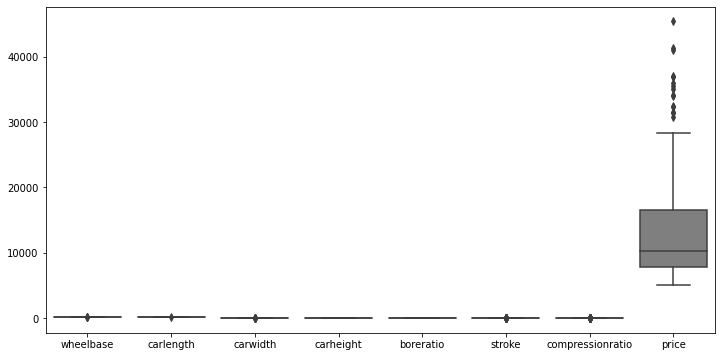

In [ ]:
# Outliers on Categorical Feature Analysis

plt.figure(figsize=(12,6))
sns.boxplot(data=dataf[contineous_feat])
plt.show()

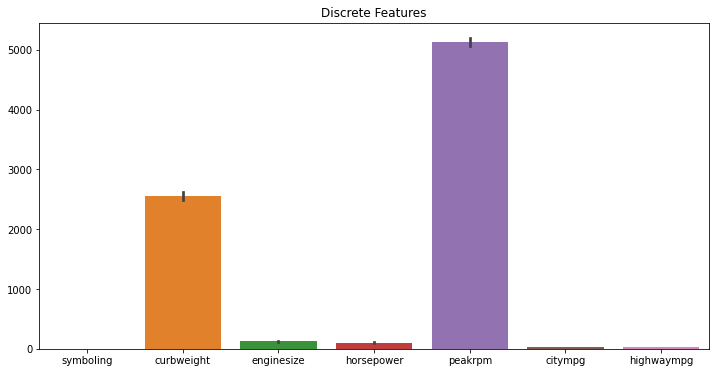

In [ ]:
# Analyze the discrete features

plt.figure(figsize=(12,6))
sns.barplot(data=dataf[discrete_feat])
plt.title('Discrete Features')
plt.show()

In [ ]:
dataf[discrete_feat].describe()

,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,2555.565854,126.907317,104.117073,5125.121951,25.219512,30.751220
std,1.245307,520.680204,41.642693,39.544167,476.985643,6.542142,6.886443
min,-2.000000,1488.000000,61.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,2145.000000,97.000000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,2414.000000,120.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,2935.000000,141.000000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,4066.000000,326.000000,288.000000,6600.000000,49.000000,54.000000


In [ ]:
dataf[contineous_feat].describe()

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,3.329756,3.255415,10.142537,13276.710571
std,6.021776,12.337289,2.145204,2.443522,0.270844,0.313597,3.972040,7988.852332
min,86.600000,141.100000,60.300000,47.800000,2.540000,2.070000,7.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,3.150000,3.110000,8.600000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,3.310000,3.290000,9.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,3.580000,3.410000,9.400000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,3.940000,4.170000,23.000000,45400.000000


<Figure size 1440x432 with 0 Axes>

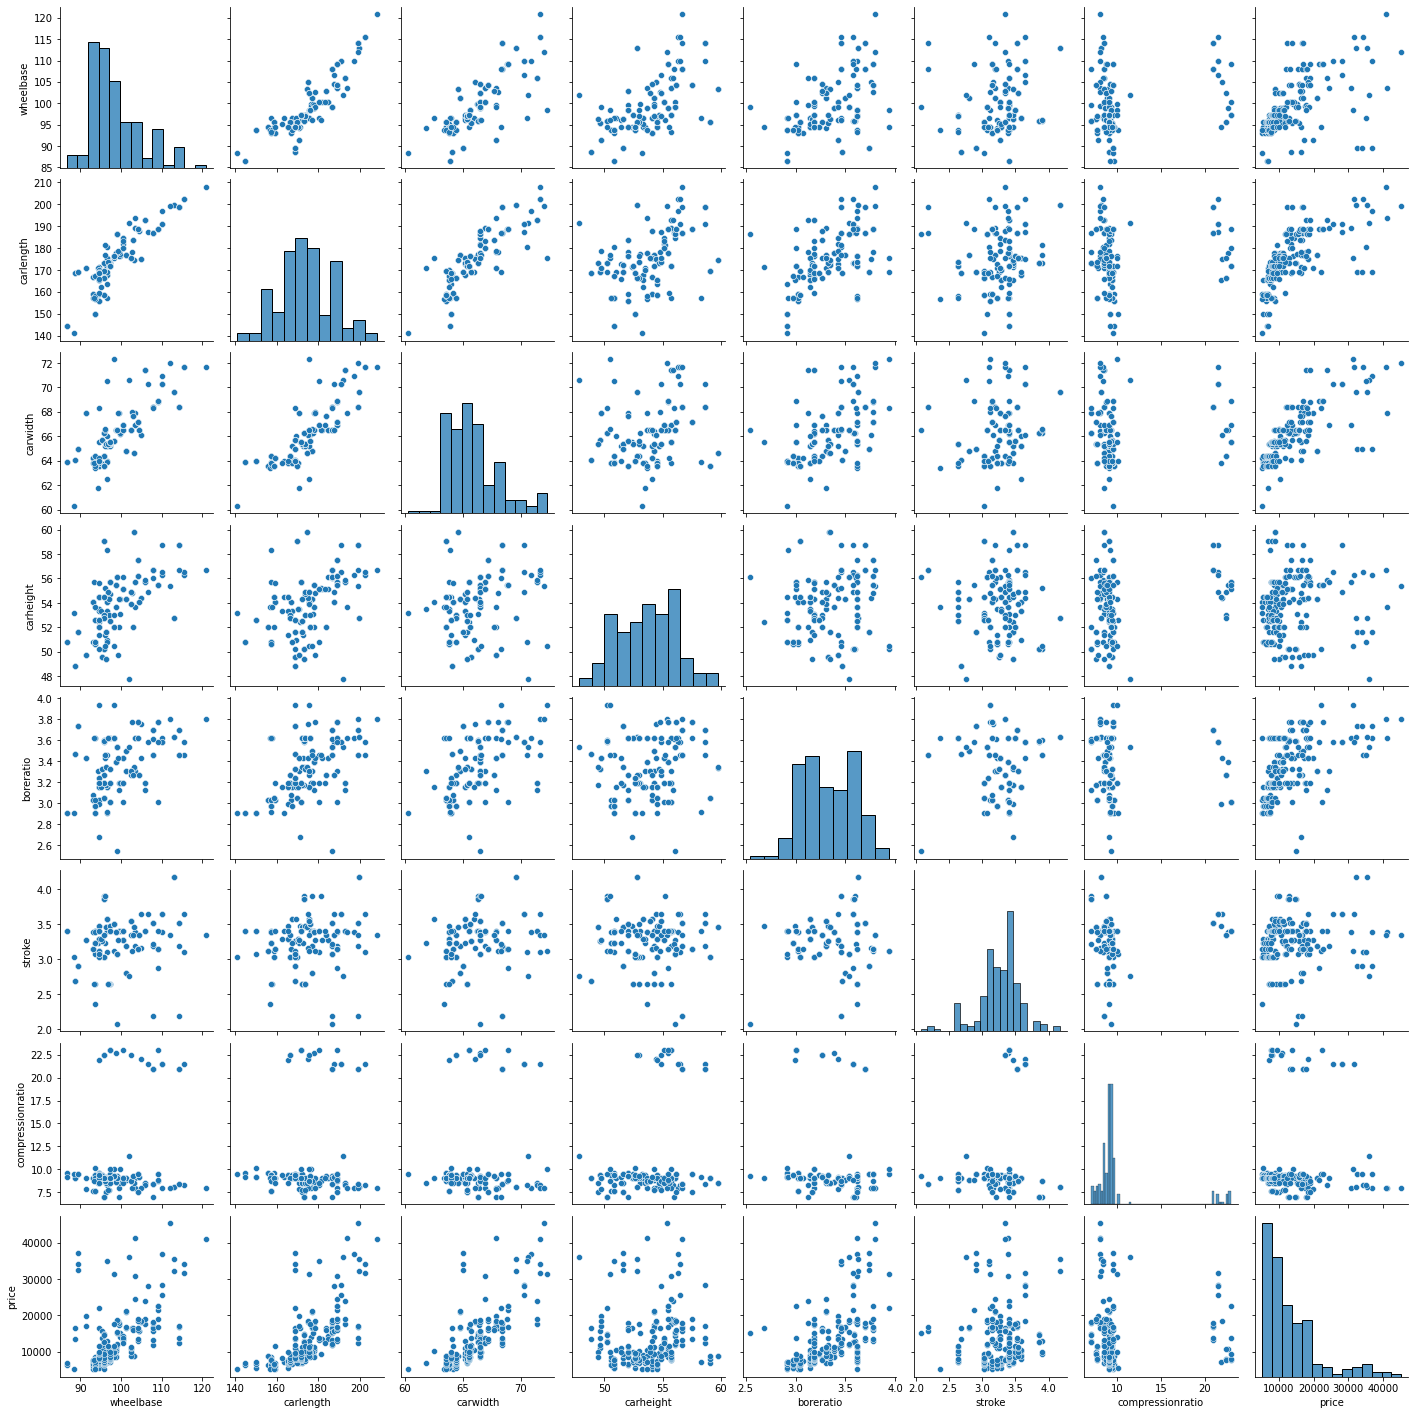

In [ ]:
# Contineous feature distribution
plt.figure(figsize=(20,6))
sns.pairplot(dataf[contineous_feat])
plt.show()

In [ ]:
#Log transformation of Contineous Features
datat = dataf.copy()
for x in contineous_feat:
  datat[x] = np.log(datat[x])

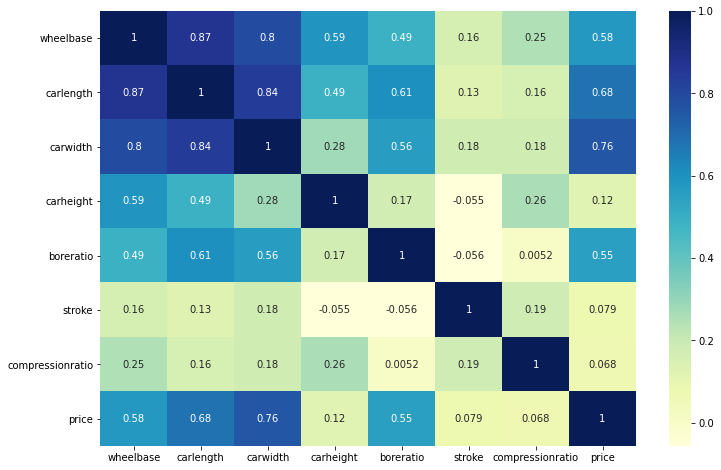

In [ ]:
# Correlation between Contineous Feature
plt.figure(figsize=(12,8))
sns.heatmap(dataf[contineous_feat].corr(), annot=True, cmap="YlGnBu")
plt.show()

Strong Correlation betwen Features

Example:
Following Data Found:
  - Wheelbase have strong correlation with [carlength, carwidth, carheight, price, borerratio]
  - Carlength have strong correlation with [wheelbase, carwidth, carheight, price, borerratio]

In [ ]:
dataf[contineous_feat].corr().abs() * 100

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
wheelbase,100.000000,87.458748,79.514364,58.943476,48.874988,16.095905,24.978585,57.781560
carlength,87.458748,100.000000,84.111827,49.102946,60.645436,12.953261,15.841371,68.292002
carwidth,79.514364,84.111827,100.000000,27.921032,55.914991,18.294169,18.112863,75.932530
carheight,58.943476,49.102946,27.921032,100.000000,17.107092,5.530667,26.121423,11.933623
boreratio,48.874988,60.645436,55.914991,17.107092,100.000000,5.590898,0.519734,55.317324
stroke,16.095905,12.953261,18.294169,5.530667,5.590898,100.000000,18.611011,7.944308
compressionratio,24.978585,15.841371,18.112863,26.121423,0.519734,18.611011,100.000000,6.798351
price,57.781560,68.292002,75.932530,11.933623,55.317324,7.944308,6.798351,100.000000


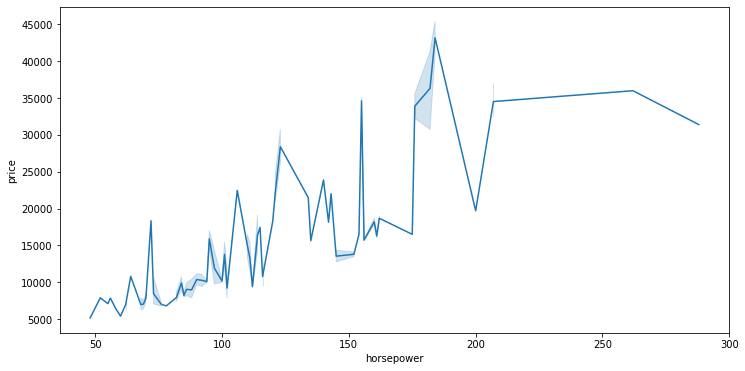

In [ ]:
# Analyze Relationship between Hrspower with Price

plt.figure(figsize=(12,6))
sns.lineplot(data=dataf, x='horsepower', y='price')
plt.show()

<Figure size 864x432 with 0 Axes>

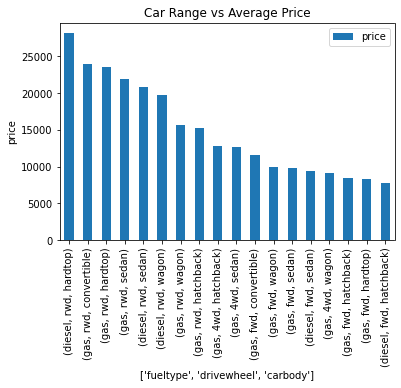

In [ ]:
# Analyze the Car Range vs Average Price

plt.figure(figsize=(12,6))
df = pd.DataFrame(dataf.groupby(['fueltype', 'drivewheel','carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.xlabel(['fueltype', 'drivewheel','carbody'])
plt.ylabel('price')
plt.show()

In [ ]:
dataf.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
dataf['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

<Figure size 864x432 with 0 Axes>

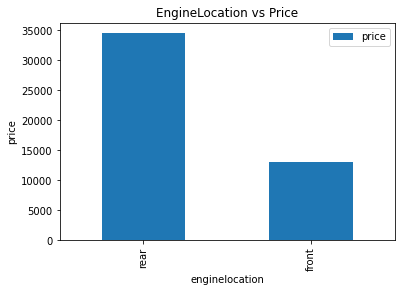

In [ ]:
# Analyze if the enginelocation with average price
plt.figure(figsize=(12,6))
dx = pd.DataFrame(dataf.groupby(['enginelocation'])['price'].mean().sort_values(ascending=False))
dx.plot.bar()
plt.xlabel('enginelocation')
plt.ylabel('price')
plt.title('EngineLocation vs Price')
plt.show()

So the Rear engine location cars average price is high

<Figure size 864x432 with 0 Axes>

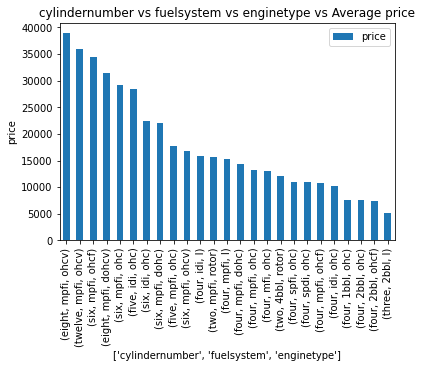

In [ ]:
# Analyze the cylindernumber vs fuelsystem vs enginetype vs Average price
plt.figure(figsize=(12,6))
df1 = pd.DataFrame(dataf.groupby(['cylindernumber', 'fuelsystem', 'enginetype'])['price'].mean().sort_values(ascending=False))
df1.plot.bar()
plt.title('cylindernumber vs fuelsystem vs enginetype vs Average price')
plt.xlabel(['cylindernumber', 'fuelsystem', 'enginetype'])
plt.ylabel('price')
plt.show()

In [ ]:
dataf['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [ ]:
# More selling Fuelsystem type
fuel_s = dataf.fuelsystem.value_counts()
fuel_s

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

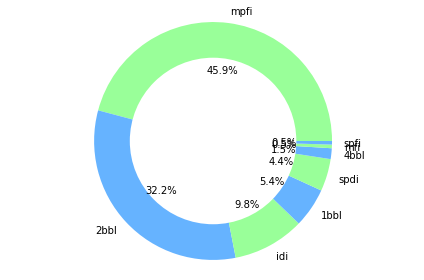

In [ ]:
fig1, ax1 = plt.subplots()
colors = ['#99ff99','#66b3ff']
ax1.pie(fuel_s, colors=colors, labels=fuel_s.index, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

45400.0

In [ ]:
# Get the price above $15,000 dollar with above 143HP car details

fivty_c = dataf[(dataf.price >= 15000) & (dataf.horsepower >= 143)][['CarName', 'fuelsystem', 'horsepower', 'price']].sort_values(by='price', ascending=False)
fivty_c

,CarName,fuelsystem,horsepower,price
74,buick regal sport coupe (turbo),mpfi,184,45400.000
16,bmw x5,mpfi,182,41315.000
73,buick century special,mpfi,184,40960.000
128,porsche boxter,mpfi,207,37028.000
17,bmw x3,mpfi,182,36880.000
49,jaguar xk,mpfi,262,36000.000
48,jaguar xf,mpfi,176,35550.000
72,buick skylark,mpfi,155,35056.000
71,buick opel isuzu deluxe,mpfi,155,34184.000
127,porsche cayenne,mpfi,207,34028.000


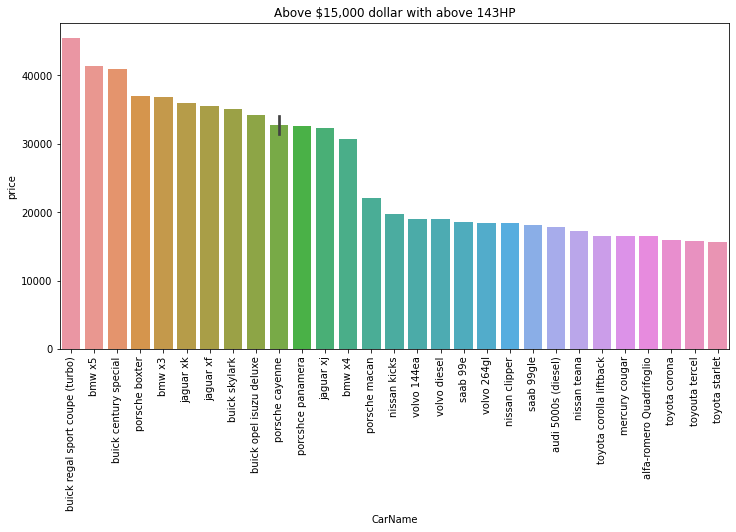

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=fivty_c[['CarName', 'price']], x='CarName', y='price')
plt.title('Above $15,000 dollar with above 143HP')
plt.xticks(rotation=90)
plt.xlabel('CarName')
plt.ylabel('price')
plt.show()

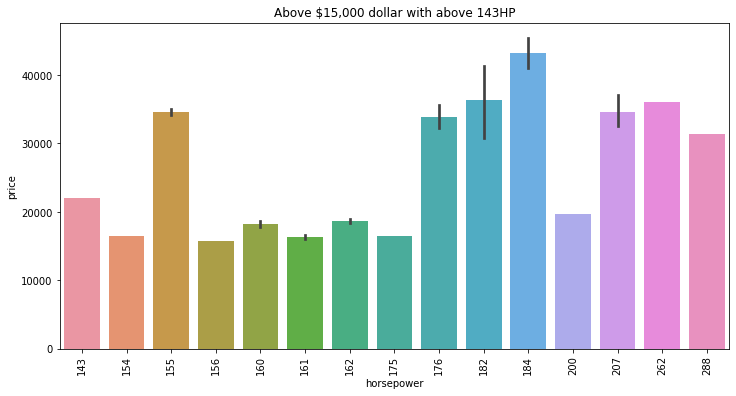

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=fivty_c[['horsepower', 'price']], x='horsepower', y='price')
plt.title('Above $15,000 dollar with above 143HP')
plt.xticks(rotation=90)
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

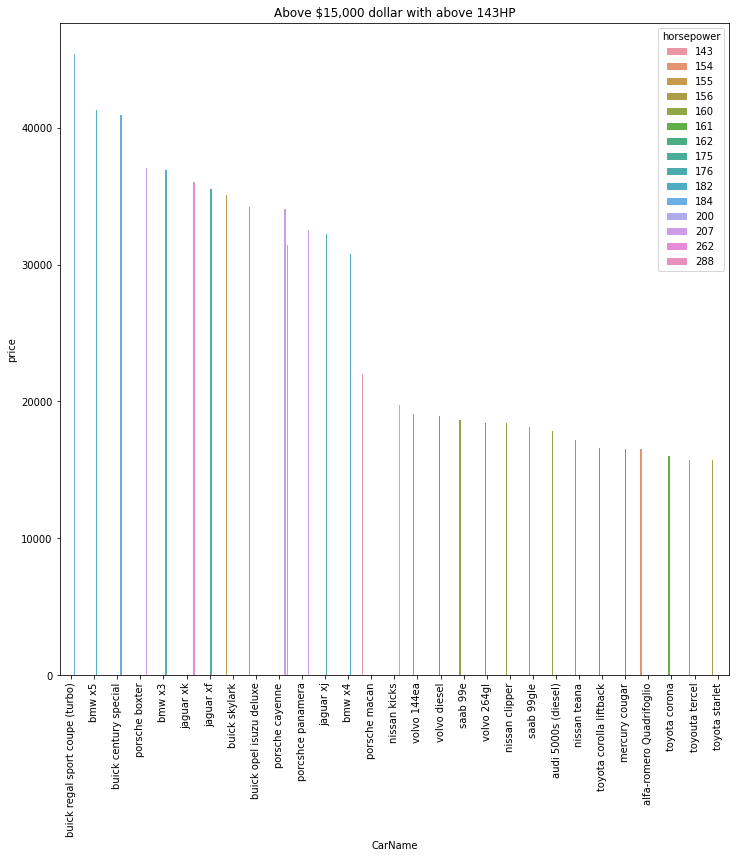

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(data=fivty_c, x='CarName', y='price', hue='horsepower')
plt.title('Above $15,000 dollar with above 143HP')
plt.xticks(rotation=90)
plt.xlabel('CarName')
plt.ylabel('price')
plt.show()